# Project: Systemic And Banking Crisis.

> ### **Title**: Training of Model.

## Table of Contents:
<ul>
<li><a href="#pv">Processing and processing of variables for the model.</a></li>
<li><a href="#bc">train of Model on Systemic Crisis.</a></li>
<li><a href="#sc">train of Model on Banking Crisis.</a></li>
<li><a href="#app">App.</a></li>
</ul>

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize': [15,8]}, font_scale=1.2)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import xgboost as XGBRFRegressor

from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [32]:
models={
    'LR':LinearRegression(),
    'RF':RandomForestRegressor(),
    'XGB':xgb()
}

TypeError: 'module' object is not callable

In [33]:
df = pd.read_csv("../03-Dataset/01-Data_Clean.csv")
print(df.shape)
display(df.head())

(1750, 20)


,WEO_Country_Code,Country,Advanced_Country,Year,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH
0,213,Argentina,0,2000,-2.878,21.830,-4.552,40.833,25.247,17.134,-0.789,12.459,15.337,-0.939,0.639,13529.290,0.995,-2.322,10.52,1.898
1,213,Argentina,0,2001,-1.316,21.068,-5.590,48.007,26.432,19.209,-4.409,12.325,13.640,-1.065,0.618,13091.488,0.929,-16.587,9.25,6.096
2,213,Argentina,0,2002,7.666,19.943,1.188,147.203,21.853,22.450,-10.894,17.631,9.965,25.869,0.794,11733.021,0.806,-53.558,12.01,0.244
3,213,Argentina,0,2003,5.597,23.526,3.453,125.162,22.026,17.250,8.955,18.474,12.877,13.443,0.859,12914.244,0.847,48.953,12.87,5.006
4,213,Argentina,0,2004,1.798,26.996,4.719,117.878,23.030,13.625,8.911,19.350,17.551,4.416,0.887,14308.616,0.878,51.050,5.96,-0.150


<a id='pv'></a>
### Processing and processing of variables for the model.

In [34]:
df.drop(["WEO_Country_Code","Country"],axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Advanced_Country  1750 non-null   int64  
 1   Year              1750 non-null   int64  
 2   BCA_NGDPD         1750 non-null   float64
 3   GGR_NGDP          1750 non-null   float64
 4   GGSB_NPGDP        1750 non-null   float64
 5   GGXWDG_NGDP       1750 non-null   float64
 6   GGX_NGDP          1750 non-null   float64
 7   LUR               1750 non-null   float64
 8   NGDP_RPCH         1750 non-null   float64
 9   NGSD_NGDP         1750 non-null   float64
 10  NID_NGDP          1750 non-null   float64
 11  PCPIPCH           1750 non-null   float64
 12  PPPEX             1750 non-null   float64
 13  PPPPC             1750 non-null   float64
 14  PPPSH             1750 non-null   float64
 15  TM_RPCH           1750 non-null   float64
 16  TRWMA             1750 non-null   float64


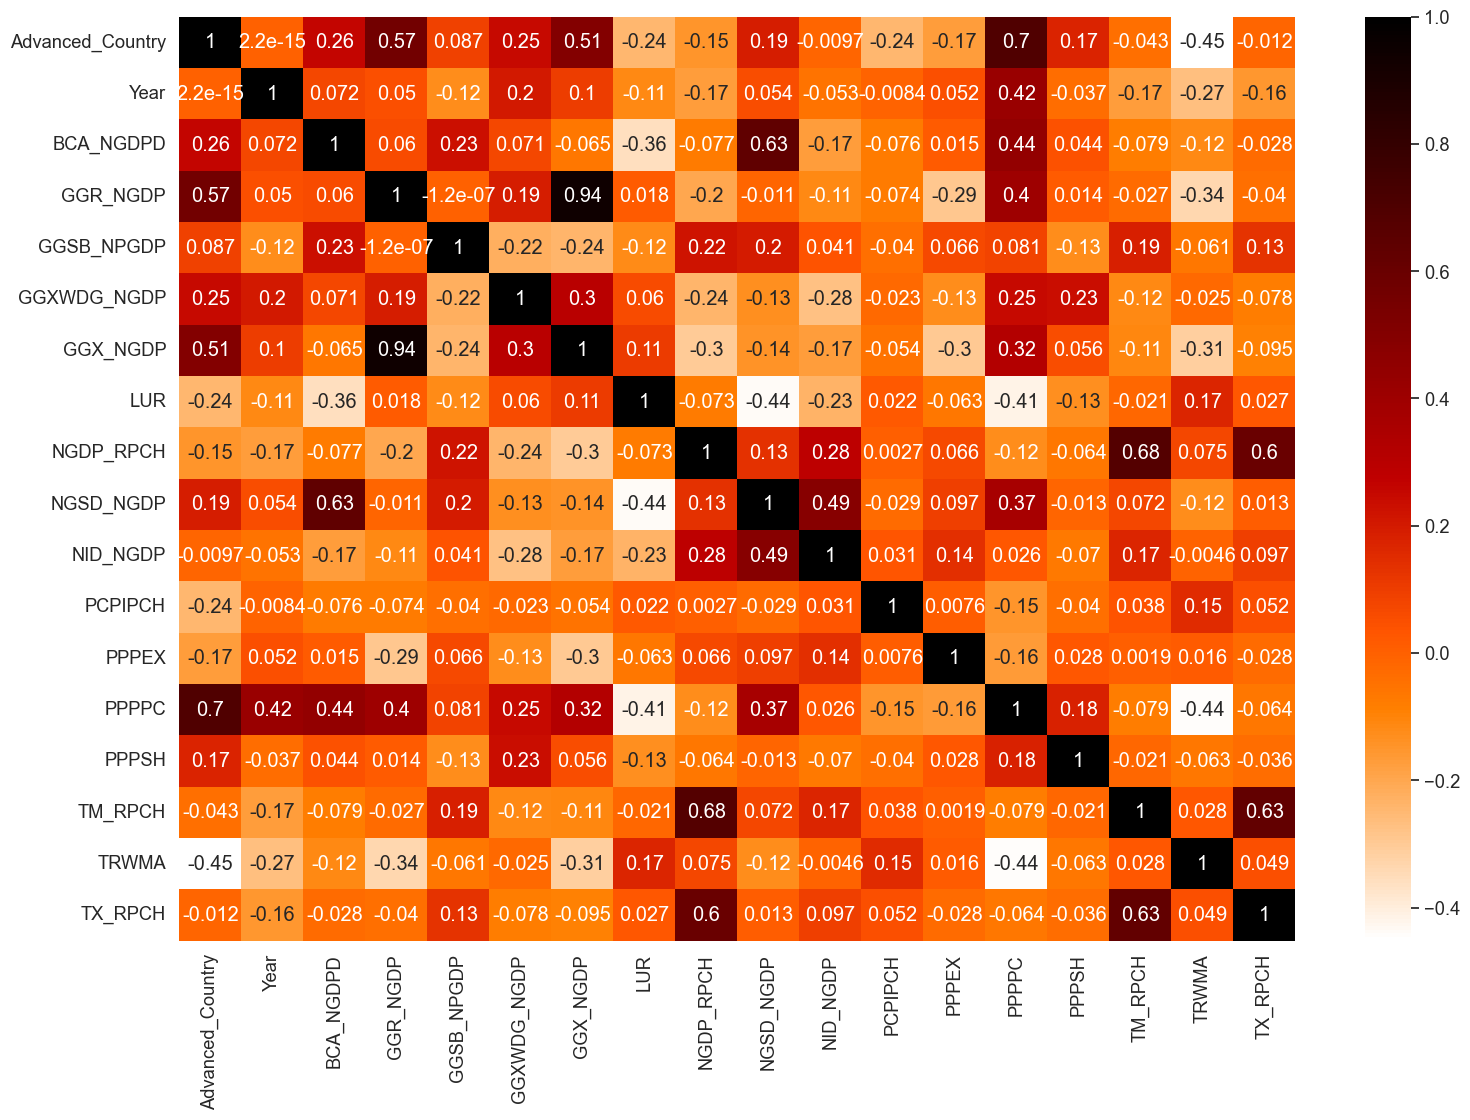

In [36]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr() ,annot=True ,cmap="gist_heat_r");

In [7]:

# 2. Define target and features
target = 'NGDP_RPCH'  # Example target variable (GDP growth)
features = df.columns.drop([target])

# 3. Encode categorical variables
# WEO_Country_Code as entity identifier (categorical)
categorical_features = ['WEO_Country_Code', 'Advanced_Country']
numerical_features = [col for col in features if col not in categorical_features]

# 4. Split data based on Year to respect time order (e.g. train: 2000-2014, val: 2015-2017, test: 2018+)
train_df = df[df['Year'] <= 2014]
val_df = df[(df['Year'] > 2014) & (df['Year'] <= 2017)]
test_df = df[df['Year'] > 2017]

X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_val = val_df.drop(columns=[target])
y_val = val_df[target]

X_test = test_df.drop(columns=[target])
y_test = test_df[target]

In [8]:

# 5. Preprocessing pipelines for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


<a id='bc'></a>
## Models

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from statsmodels.regression.mixed_linear_model import MixedLM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import statsmodels.api as sm

# Load data
df = pd.read_csv("../03-Dataset/01-Data_Clean.csv")
print(df.shape)
display(df.head())

# 1. Data Preprocessing

# Drop rows with missing target values if any
df = df.dropna(subset=['TX_RPCH'])

# Define target and features
target = 'TX_RPCH'

# Features - exclude target, non-numeric country name and year for now (year will be encoded)
features = df.drop(columns=['TX_RPCH', 'Country'])  # Drop 'Country' (categorical, redundant with code)

# We keep 'WEO_Country_Code' and 'Year' for panel structure

# Separate features and target
X = features
y = df[target]

# Sort by country and year to maintain time order per entity
X = X.sort_values(by=['WEO_Country_Code', 'Year'])
y = y.loc[X.index]

# 2. Encoding categorical variables

# 'WEO_Country_Code' is categorical entity id - encode with OneHotEncoder
# 'Year' - can be treated as numeric or categorical (here numeric)

cat_features = ['WEO_Country_Code']
num_features = [col for col in X.columns if col not in cat_features]

# Build a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('num', StandardScaler(), num_features)
])

# 3. Split the data
# We split by time to avoid leakage
# For simplicity, we split by years (for example last 2 years for test, 1 year for validation)

years = sorted(X['Year'].unique())
train_years = years[:-3]
val_year = years[-3]
test_years = years[-2:]

train_mask = X['Year'].isin(train_years)
val_mask = X['Year'] == val_year
test_mask = X['Year'].isin(test_years)

X_train_raw, y_train = X[train_mask], y[train_mask]
X_val_raw, y_val = X[val_mask], y[val_mask]
X_test_raw, y_test = X[test_mask], y[test_mask]

# Fit preprocessor on train and transform all sets
preprocessor.fit(X_train_raw)
X_train = preprocessor.transform(X_train_raw)
X_val = preprocessor.transform(X_val_raw)
X_test = preprocessor.transform(X_test_raw)

print(f'Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}')


(1750, 20)


,WEO_Country_Code,Country,Advanced_Country,Year,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH
0,213,Argentina,0,2000,-2.878,21.830,-4.552,40.833,25.247,17.134,-0.789,12.459,15.337,-0.939,0.639,13529.290,0.995,-2.322,10.52,1.898
1,213,Argentina,0,2001,-1.316,21.068,-5.590,48.007,26.432,19.209,-4.409,12.325,13.640,-1.065,0.618,13091.488,0.929,-16.587,9.25,6.096
2,213,Argentina,0,2002,7.666,19.943,1.188,147.203,21.853,22.450,-10.894,17.631,9.965,25.869,0.794,11733.021,0.806,-53.558,12.01,0.244
3,213,Argentina,0,2003,5.597,23.526,3.453,125.162,22.026,17.250,8.955,18.474,12.877,13.443,0.859,12914.244,0.847,48.953,12.87,5.006
4,213,Argentina,0,2004,1.798,26.996,4.719,117.878,23.030,13.625,8.911,19.350,17.551,4.416,0.887,14308.616,0.878,51.050,5.96,-0.150


Train shape: (1540, 87), Validation shape: (70, 87), Test shape: (140, 87)


In [11]:
# --------------------
# 4. Model 1: Random Forest Regressor
# --------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_val_preds = rf.predict(X_val)
rf_test_preds = rf.predict(X_test)

In [12]:

# --------------------
# 5. Model 2: XGBoost Regressor
# --------------------

# Prepare DMatrix for train and validation sets
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 42
}

evals = [(dval, 'eval')]

xgboost_model = xgb.train(params, dtrain, num_boost_round=100,
                          evals=evals,
                          early_stopping_rounds=10,
                          verbose_eval=False)

# Predict
xgb_val_preds = xgboost_model.predict(dval)
dtest = xgb.DMatrix(X_test)
xgb_test_preds = xgboost_model.predict(dtest)




In [14]:
# التأكد من إضافة نفس الأعمدة تمامًا
exog_val = df_val_mixedlm[exog_vars]
exog_val = sm.add_constant(exog_val, has_constant='add')  # add 'const' if not present

# التأكد من تطابق الأعمدة مع exog
exog_val = exog_val[exog.columns]


In [15]:
mixedlm_val_preds = mixedlm_result.predict(exog_val)


In [16]:
exog_val = exog_val[exog.columns]


In [19]:
print("Train columns:", exog.columns)
print("Validation columns:", exog_val.columns)


Train columns: Index(['const', 'Advanced_Country', 'Year', 'BCA_NGDPD', 'GGR_NGDP',
       'GGSB_NPGDP', 'GGXWDG_NGDP', 'GGX_NGDP', 'LUR', 'NGDP_RPCH',
       'NGSD_NGDP', 'NID_NGDP', 'PCPIPCH', 'PPPEX', 'PPPPC', 'PPPSH',
       'TM_RPCH', 'TRWMA'],
      dtype='object')
Validation columns: Index(['Advanced_Country', 'Year', 'BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP',
       'GGXWDG_NGDP', 'GGX_NGDP', 'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP',
       'PCPIPCH', 'PPPEX', 'PPPPC', 'PPPSH', 'TM_RPCH', 'TRWMA'],
      dtype='object')


In [20]:
# --------------------
# 6. Model 3: Linear Mixed Effects Model
# --------------------
# MixedLM requires a DataFrame with a formula, so we combine features with target and use country as groups
# We'll only use numeric features and country code as groups

# Prepare data for MixedLM
df_mixedlm = pd.concat([X_train_raw, y_train], axis=1)
exog_vars = num_features  # only numeric predictors
exog = df_mixedlm[exog_vars]
exog = sm.add_constant(exog)  # add intercept
groups = df_mixedlm['WEO_Country_Code']

import statsmodels.api as sm

mixedlm_model = MixedLM(endog=y_train, exog=exog, groups=groups)
mixedlm_result = mixedlm_model.fit()
print(mixedlm_result.summary())

# Predict on validation set
df_val_mixedlm = pd.concat([X_val_raw, y_val], axis=1)
exog_val = df_val_mixedlm[exog_vars]
exog_val = sm.add_constant(exog_val, has_constant='add')
exog_val = exog_val[exog.columns]
mixedlm_val_preds = mixedlm_result.predict(exog_val)

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   TX_RPCH   
No. Observations:   1540      Method:               REML      
No. Groups:         70        Scale:                40.7188   
Min. group size:    22        Log-Likelihood:       -5097.9232
Max. group size:    22        Converged:            Yes       
Mean group size:    22.0                                      
--------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
const            130.901   75.504  1.734 0.083 -17.085 278.886
Advanced_Country   2.086    0.779  2.678 0.007   0.559   3.613
Year              -0.065    0.038 -1.717 0.086  -0.138   0.009
BCA_NGDPD          0.351    0.054  6.502 0.000   0.245   0.457
GGR_NGDP          -0.211    0.078 -2.696 0.007  -0.364  -0.058
GGSB_NPGDP        -0.007    0.083 -0.085 0.933  -0.169   0.155
GGXWD

In [22]:
# --------------------
# 6. Model 3: Linear Mixed Effects Model
# --------------------

import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Prepare the training data for MixedLM
# Combine features and target into a single DataFrame
df_mixedlm = pd.concat([X_train_raw, y_train], axis=1)

# Use only numeric features as exogenous variables (predictors)
exog_vars = num_features
exog = df_mixedlm[exog_vars]

# Add a constant term (intercept) to the predictors
exog = sm.add_constant(exog, has_constant='add')

# Define grouping variable (e.g., countries)
groups = df_mixedlm['WEO_Country_Code']

# Fit the Linear Mixed Effects Model
mixedlm_model = MixedLM(endog=y_train, exog=exog, groups=groups)
mixedlm_result = mixedlm_model.fit()

# Display model summary
print(mixedlm_result.summary())

# --------------------
# Predict on the validation set
# --------------------

# Combine validation features and target into a single DataFrame
df_val_mixedlm = pd.concat([X_val_raw, y_val], axis=1)

# Select the same numeric features for the validation set
exog_val = df_val_mixedlm[exog_vars]

# Add a constant term to the validation predictors
exog_val = sm.add_constant(exog_val, has_constant='add')

# Reorder the validation predictors to match the training exog columns
exog_val = exog_val[exog.columns]

# Predict using the fitted model
mixedlm_val_preds = mixedlm_result.predict(exog_val)


            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   TX_RPCH   
No. Observations:   1540      Method:               REML      
No. Groups:         70        Scale:                40.7188   
Min. group size:    22        Log-Likelihood:       -5097.9232
Max. group size:    22        Converged:            Yes       
Mean group size:    22.0                                      
--------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
const            130.901   75.504  1.734 0.083 -17.085 278.886
Advanced_Country   2.086    0.779  2.678 0.007   0.559   3.613
Year              -0.065    0.038 -1.717 0.086  -0.138   0.009
BCA_NGDPD          0.351    0.054  6.502 0.000   0.245   0.457
GGR_NGDP          -0.211    0.078 -2.696 0.007  -0.364  -0.058
GGSB_NPGDP        -0.007    0.083 -0.085 0.933  -0.169   0.155
GGXWD

In [33]:
# --------------------
# 7. Model 4: LSTM Neural Network (Corrected)
# --------------------

import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 1. Helper: create sequences for each entity
def create_lstm_dataset(X_raw, y, entities, time_steps=3):
    X_lstm, y_lstm = [], []
    for entity in entities:
        # filter and sort by time
        ed = X_raw[X_raw['WEO_Country_Code'] == entity].sort_values('Year')
        et = y.loc[ed.index]
        # drop non-feature cols
        feats = ed.drop(columns=['WEO_Country_Code', 'Year'])
        if feats.shape[0] <= time_steps:
            continue
        # scale features
        feats_scaled = StandardScaler().fit_transform(feats)
        # sliding window
        for i in range(len(feats_scaled) - time_steps):
            X_lstm.append(feats_scaled[i : i + time_steps])
            y_lstm.append(et.iloc[i + time_steps])
    X_arr = np.array(X_lstm)            # shape => (samples, time_steps, features)
    y_arr = np.array(y_lstm).reshape(-1)  # shape => (samples,)
    return X_arr, y_arr

# 2. Define time steps and entities
time_steps = 3
entities = X['WEO_Country_Code'].unique()

# 3. Build datasets
X_train_lstm, y_train_lstm = create_lstm_dataset(X_train_raw, y_train, entities, time_steps)
X_val_lstm,   y_val_lstm   = create_lstm_dataset(X_val_raw,   y_val,   entities, time_steps)
X_test_lstm,  y_test_lstm  = create_lstm_dataset(X_test_raw,  y_test,  entities, time_steps)

# 4. Verify shapes
print("Train X shape:", X_train_lstm.shape)  # (n_samples, 3, n_features)
print("Train y shape:", y_train_lstm.shape)  # (n_samples,)

# 5. Define the Sequential LSTM model with an explicit Input layer
n_features = X_train_lstm.shape[2]
model = Sequential([
    Input(shape=(time_steps, n_features)),
    LSTM(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # regression output
])

# 6. Compile the model
model.compile(optimizer='adam', loss='mse')

# 7. Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 8. Train the model
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_lstm, y_val_lstm),
    callbacks=[early_stop],
    verbose=1
)

# 9. Make predictions
lstm_val_preds = model.predict(X_val_lstm)
lstm_test_preds = model.predict(X_test_lstm)


Train X shape: (1330, 3, 16)
Train y shape: (1330,)
Epoch 1/50
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 89.3763

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (None, 3, 16), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

In [ ]:
# --------------------
# 8. Evaluate models (e.g., RMSE)
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print("Random Forest Validation RMSE:", rmse(y_val, rf_val_preds))
print("Random Forest Test RMSE:", rmse(y_test, rf_test_preds))

print("XGBoost Validation RMSE:", rmse(y_val, xgb_val_preds))
print("XGBoost Test RMSE:", rmse(y_test, xgb_test_preds))

print("MixedLM Validation RMSE:", rmse(y_val, mixedlm_val_preds))

print("LSTM Validation RMSE:", rmse(y_val_lstm, lstm_val_preds.flatten()))
print("LSTM Test RMSE:", rmse(y_test_lstm, lstm_test_preds.flatten()))

In [15]:
from sklearn.model_selection import train_test_split

xb_train,xb_test,yb_train,yb_test=train_test_split(x,y_b,test_size=0.35)


In [16]:
for name,model in models.items():
    print(f'using{name}')
    model.fit(xb_train,yb_train.values.ravel())
    yb_pred=model.predict(xb_test)
    print(f'training ACC: {accuracy_score(yb_train,model.predict(xb_train))}')
    print(f'testing ACC: {accuracy_score(yb_test,yb_pred)}')

usingLR
training ACC: 0.9056435819832651
testing ACC: 0.9147107438016528
usingKNN
training ACC: 0.9250489585187822
testing ACC: 0.915702479338843
usingDT
training ACC: 0.9759658180523411
testing ACC: 0.8991735537190083
usingSVC
training ACC: 0.9058216129606551
testing ACC: 0.9147107438016528
usingNB
training ACC: 0.18087947302830693
testing ACC: 0.17256198347107438
usingRF
training ACC: 0.9656400213637173
testing ACC: 0.9206611570247933
usingXGBC
training ACC: 0.959408937155065
testing ACC: 0.92099173553719


In [17]:
model_b = RandomForestClassifier()

model_b.fit(xb_train, yb_train.values.ravel())

RandomForestClassifier()

<a id='sc'></a>
## Systemic_Crisis

In [18]:
y_s

,Systemic_Crisis
0,1
1,0
2,0
3,0
4,0
...,...
8637,1
8638,0
8639,0
8640,0


In [19]:
from sklearn.model_selection import train_test_split

xs_train,xs_test,ys_train,ys_test=train_test_split(x,y_s,test_size=0.35)


In [20]:
for name,model in models.items():
    print(f'using{name}')
    model.fit(xs_train,ys_train.values.ravel())
    ys_pred=model.predict(xs_test)
    print(f'training ACC: {accuracy_score(ys_train,model.predict(xs_train))}')
    print(f'testing ACC: {accuracy_score(ys_test,ys_pred)}')

usingLR
training ACC: 0.937689157913477
testing ACC: 0.9381818181818182
usingKNN
training ACC: 0.9457005518960299
testing ACC: 0.9345454545454546
usingDT
training ACC: 0.9846893359444543
testing ACC: 0.9256198347107438
usingSVC
training ACC: 0.937689157913477
testing ACC: 0.9381818181818182
usingNB
training ACC: 0.3421755385437066
testing ACC: 0.3338842975206612
usingRF
training ACC: 0.9798824995549226
testing ACC: 0.9391735537190082
usingXGBC
training ACC: 0.9768559729392914
testing ACC: 0.943801652892562


In [21]:
model_s = RandomForestClassifier()

model_s.fit(xs_train, ys_train.values.ravel())

RandomForestClassifier()

# Save Models.

In [22]:
features=x.columns
features

Index(['Year', 'Gold_Standard', 'Exch_Usd', 'Domestic_Debt_In_Default',
       'Sovereign_External_Debt_1', 'Sovereign_External_Debt_2',
       'Gdp_Weighted_Default', 'Inflation', 'Independence', 'Currency_Crises',
       'Inflation_Crises', 'USA', 'Level_Country_Developed regions',
       'Level_Country_Developing regions'],
      dtype='object')

In [23]:
import joblib

joblib.dump(model_b, 'model_b.h5')
joblib.dump(model_s, 'model_s.h5')

joblib.dump(features, 'features.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

<a id='ml'></a>
# App

In [2]:
import joblib
import numpy as np

model_b=joblib.load('model_b.h5')
model_s=joblib.load('model_s.h5')

features=joblib.load('features.h5')
scaler=joblib.load('scaler.h5')


In [3]:
features

Index(['Year', 'Gold_Standard', 'Exch_Usd', 'Domestic_Debt_In_Default',
       'Sovereign_External_Debt_1', 'Sovereign_External_Debt_2',
       'Gdp_Weighted_Default', 'Inflation', 'Independence', 'Currency_Crises',
       'Inflation_Crises', 'USA', 'Level_Country_Developed regions',
       'Level_Country_Developing regions'],
      dtype='object')

In [4]:
x1_year=int(input(f"Enter {features[0]}:"))
x2_gstd=int(input(f"Enter {features[1]}:"))
x3_exus=float(input(f"Enter {features[2]}:"))
x4_domdeb=int(input(f"Enter {features[3]}:"))
x5_sovext1=int(input(f"Enter {features[4]}:"))
x6_sovext2=int(input(f"Enter {features[5]}:"))
x7_gdp=float(input(f"Enter {features[6]}:"))
x8_inf=float(input(f"Enter {features[7]}:"))
x9_ind=int(input(f"Enter {features[8]}:"))
x10_curcs=int(input(f"Enter {features[9]}:"))
x11_infcs=int(input(f"Enter {features[10]}:"))
x12_labed=int(input(f"Enter {features[11]}:"))
x13_labeg=int(input(f"Enter {features[12]}:"))
x14_labeg=int(input(f"Enter {features[13]}:"))

Enter Year:2025
Enter Gold_Standard:0
Enter Exch_Usd:19
Enter Domestic_Debt_In_Default:1
Enter Sovereign_External_Debt_1:1
Enter Sovereign_External_Debt_2:1
Enter Gdp_Weighted_Default:0
Enter Inflation:0.2
Enter Independence:1
Enter Currency_Crises:1
Enter Inflation_Crises:1
Enter USA:0
Enter Level_Country_Developed regions:0
Enter Level_Country_Developing regions:1


In [5]:
x=[x1_year,x2_gstd,x3_exus,x4_domdeb,x5_sovext1,x6_sovext2,x7_gdp,x8_inf,x9_ind,x10_curcs,x11_infcs,x12_labed,x13_labeg,x14_labeg]

In [6]:
d=np.array(x)
ds=scaler.transform([d[[0,2,6,7]]])
data_scaled=np.array([[ds[0][0],d[1],ds[0][1],d[3],d[4],d[5],ds[0][2],ds[0][3],d[8],d[9],d[10],d[11],d[12],d[13]]])


### Is there Systemic Crisis.

In [7]:
pred_s=model_s.predict(data_scaled)[0]
pred_s

0

### Is there Banking Crisis .

In [8]:
pred_b=model_b.predict(data_scaled)[0]
pred_b

0